<center><h1 style="color:#000080; font-size:50px">Titanic Classification</h1></center>

<p><b>Import necessary libraries</p>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<p><b>Import Data</p>

In [2]:
data=pd.read_csv("titanic.csv")
data.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<p><b>Data Preprocessing And Data Cleaning</p>

In [3]:
data = data.dropna()

In [4]:
print("Columns before get_dummies:", data.columns)

Columns before get_dummies: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked',], drop_first=True)
print("Columns after get_dummies:", data.columns)

Columns after get_dummies: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


<p><b>Model Selection and Training</p>

In [6]:
X = data.drop('Survived', axis=1)  
y = data['Survived']
data.head(11)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,True,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,False,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,False,False,True
21,22,1,2,"Beesley, Mr. Lawrence",34.0,0,0,248698,13.0000,D56,True,False,True
23,24,1,1,"Sloper, Mr. William Thompson",28.0,0,0,113788,35.5000,A6,True,False,True
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0000,C23 C25 C27,True,False,True
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,1,0,PC 17572,76.7292,D33,False,False,False
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",65.0,0,1,113509,61.9792,B30,True,False,False


<p><b>Split the Dataset into Training and Testing Sets</p>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<p>Drop the Cabin, Ticket, Age, Fare and Name Columns</p>

In [ ]:
X_train = X_train.drop(['Cabin', 'Ticket','Age','Fare','Name'], axis=1)
X_test = X_test.drop(['Cabin', 'Ticket','Age','Fare','Name'], axis=1)
data.head(11)

<p><b>Model Implementation</p>

In [9]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.7837837837837838
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.80      0.87      0.83        23

    accuracy                           0.78        37
   macro avg       0.78      0.76      0.76        37
weighted avg       0.78      0.78      0.78        37



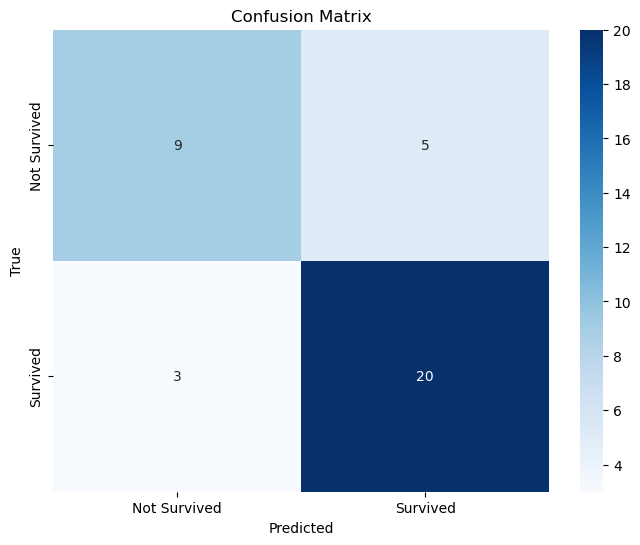

In [11]:
conf_mat = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

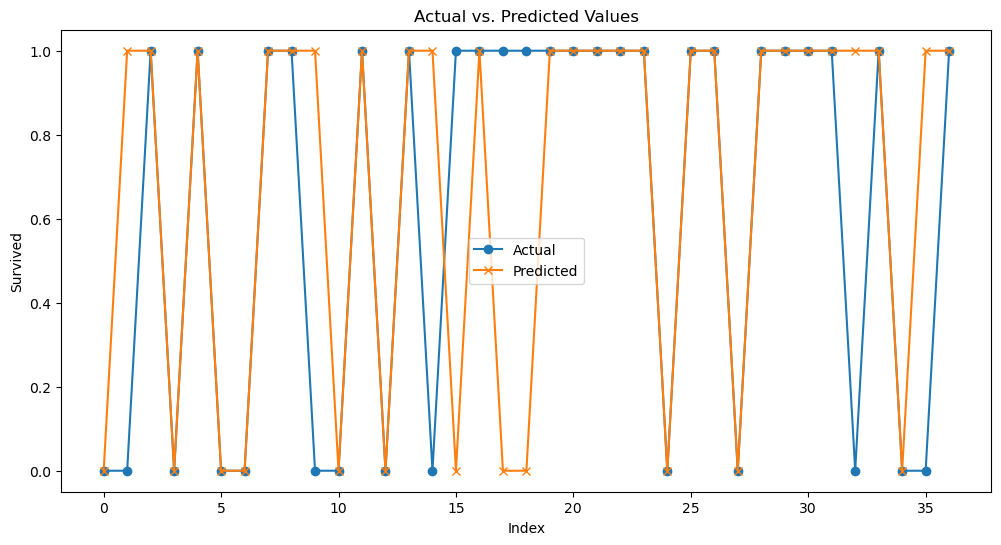

In [12]:
predictions = classifier.predict(X_test)
indices = np.arange(len(predictions))
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test, label='Actual', marker='o')
plt.plot(indices, predictions, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Survived')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()